1. Eplatory Data Analysis

1.1.1



In [119]:
from random import gauss
from random import seed
from pandas import  Series


seed(10)
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
print(series)
mean = series.mean()

#standard deviation
std = series.std()
print(mean)
print(std)

0     -0.953717
1     -0.459094
2     -0.599249
3     -0.320142
4      0.721718
         ...   
995   -0.954053
996    0.870732
997   -0.772156
998   -0.194007
999   -0.750134
Length: 1000, dtype: float64
-0.07120429237582035
0.9922827480232803


In [120]:
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

def plot(series, lags):
    pyplot.figure()
    series.plot.line(title='Line plot')
    pyplot.figure()
    series.plot.hist(title = 'Histogram')
    # density plot
    pyplot.figure()
    series.plot.density()
    # box plot
    pyplot.figure()
    series.plot.box(title = 'Box plot')
    # lag-1 plot
    pyplot.figure()
    import pandas as pd
    pd.plotting.lag_plot(series, lag=1)
    # acf graph
    plot_acf(series, lags=lags)
    pyplot.show()
    plot_pacf(series, lags=lags)
    pyplot.show()


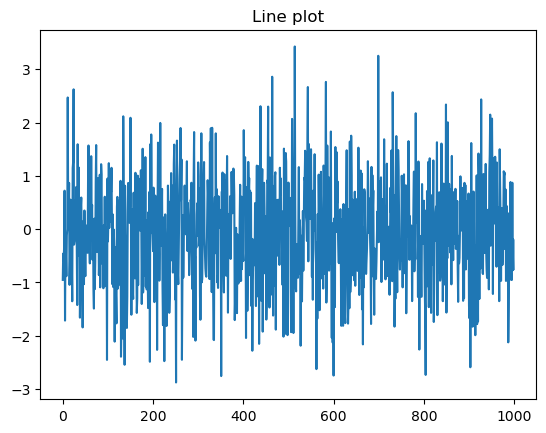

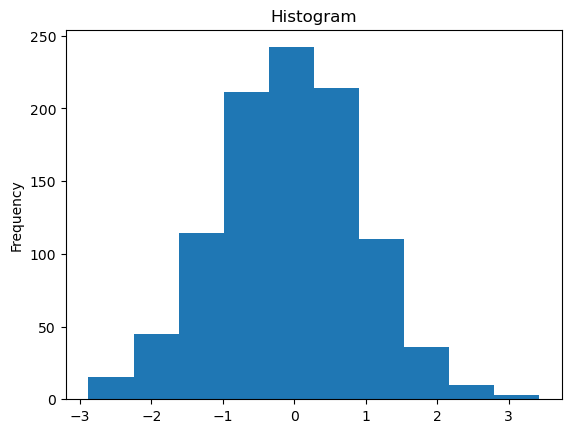

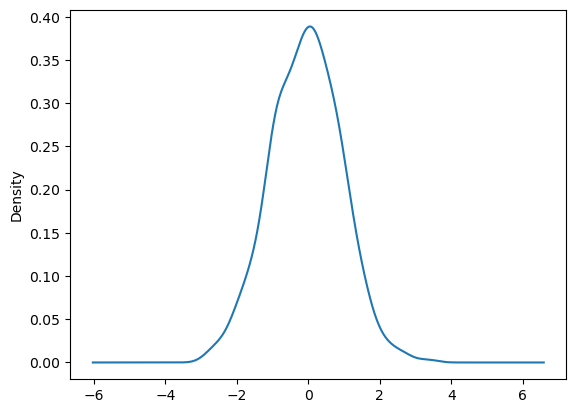

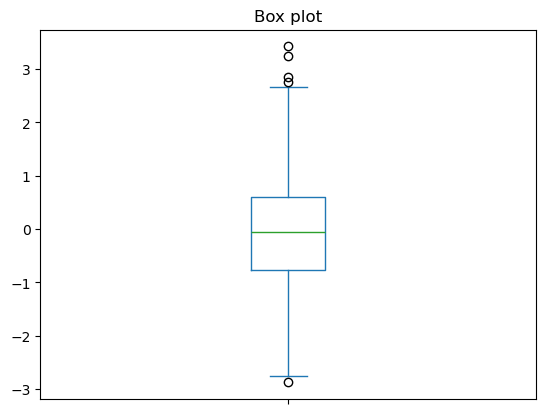

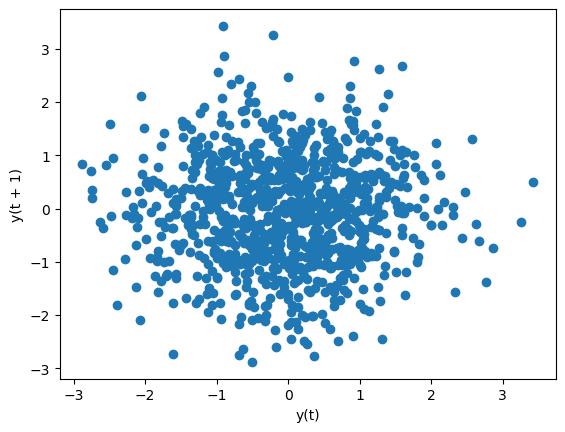

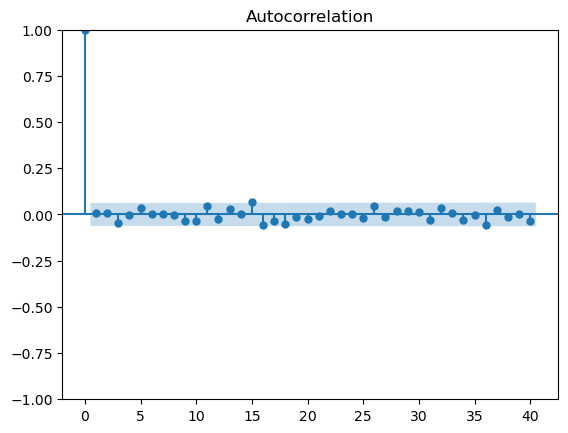

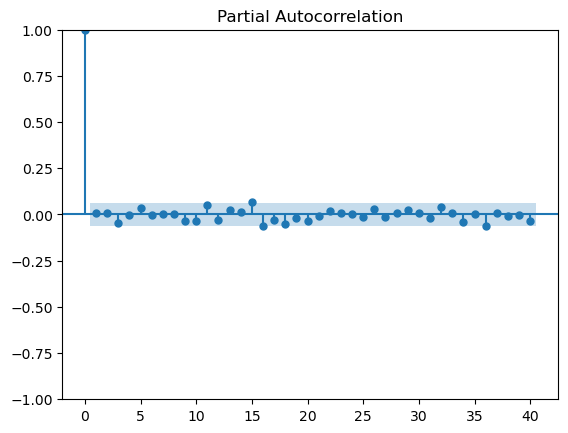

1000


In [256]:
plot(series, lags=40)

1.1.2


In [257]:
series_all = []
series_mean = []
for i in range(100):
    seed(i)
    series_noise = [gauss(0.0, 1.0) for i in range(1000)]
    series_all.append(series_noise)

for i in range(1000):
    sum = 0
    for j in range(100):
        sum += series_all[j][i]
    series_mean.append(sum/100)

series_combined_random = Series(series_mean)

mean = series_combined_random.mean()

#standard deviation
std = series_combined_random.std()
print(mean)
print(std)

1000


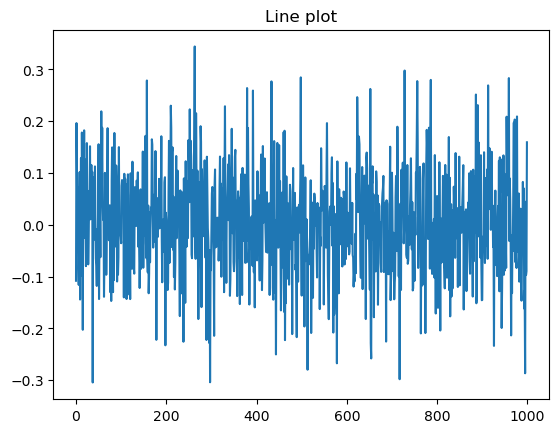

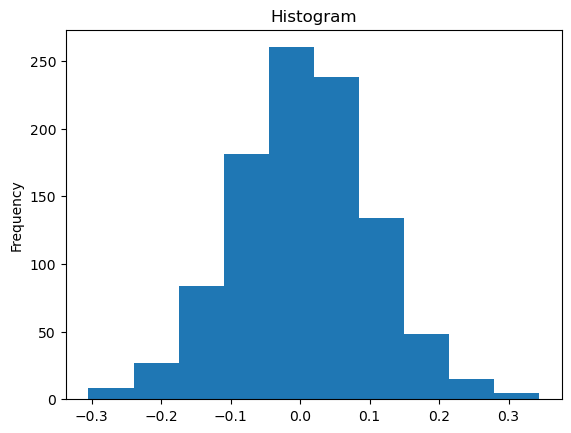

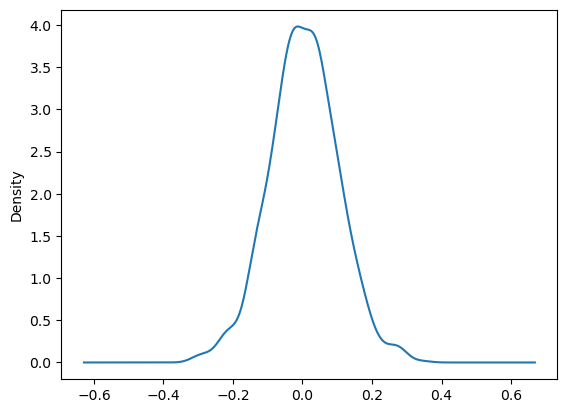

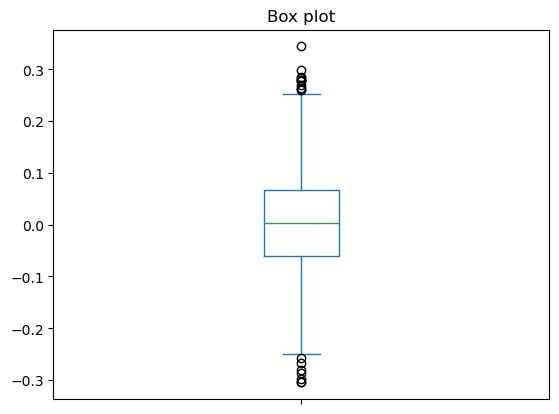

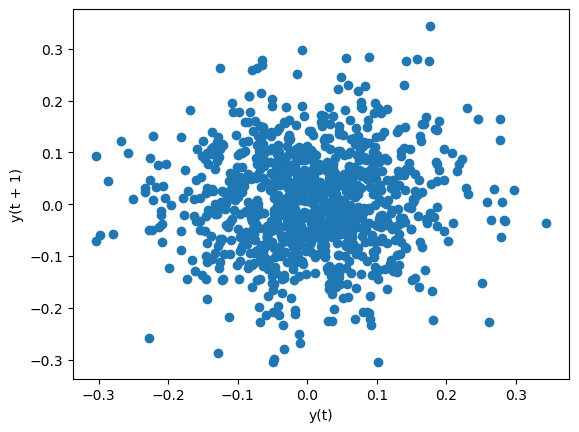

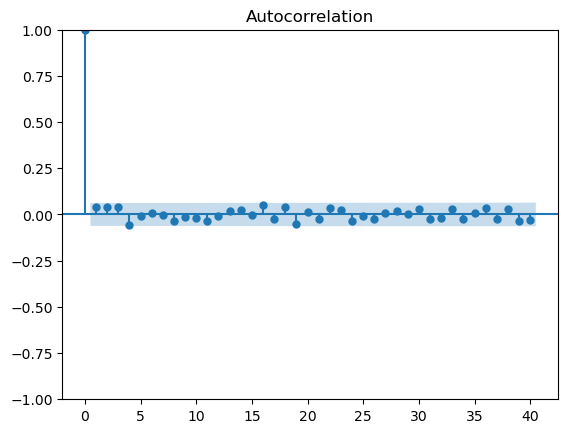

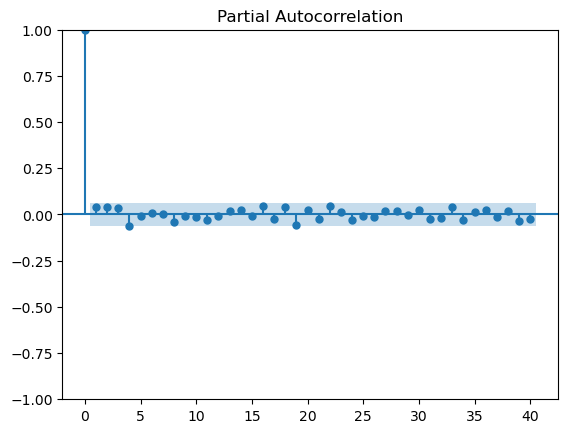

In [276]:
plot(series_combined_random, lags=40)

1.1.3


In [277]:
import statsmodels.api as sm

seed(10)
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
sm.stats.acorr_ljungbox(series, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,6.391248,0.781391


In [278]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.336703
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


1.2.1


In [279]:
import random

seed(10)
sequence = [-1,1]
random_walk = [0]
for i in range(1000):
    x = random.choice(sequence)
    value= x + random_walk[i]
    random_walk.append(value)

random_walk = Series(random_walk)

1.2.2


In [280]:
random_walk.mean()


13.804195804195805

In [281]:
random_walk.std()


7.486896712097862

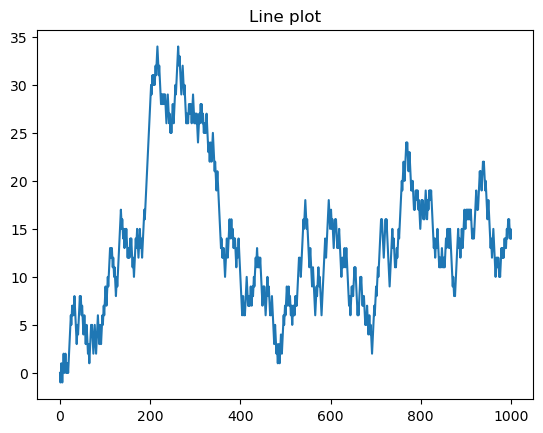

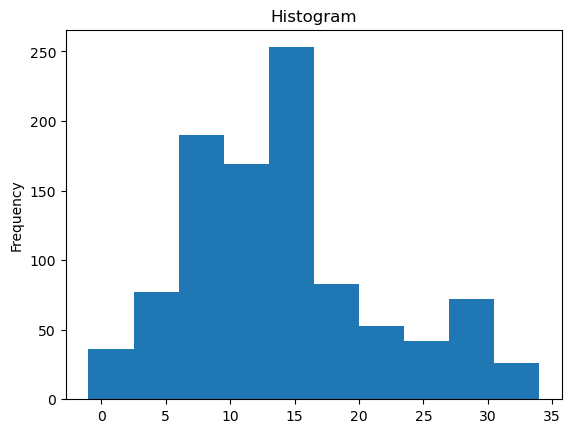

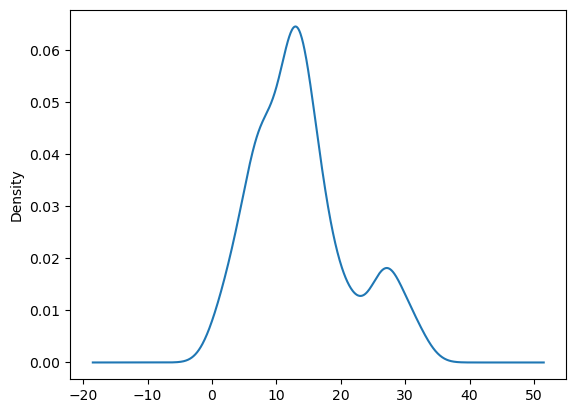

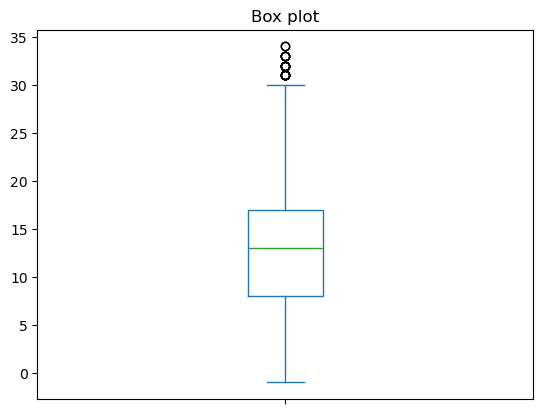

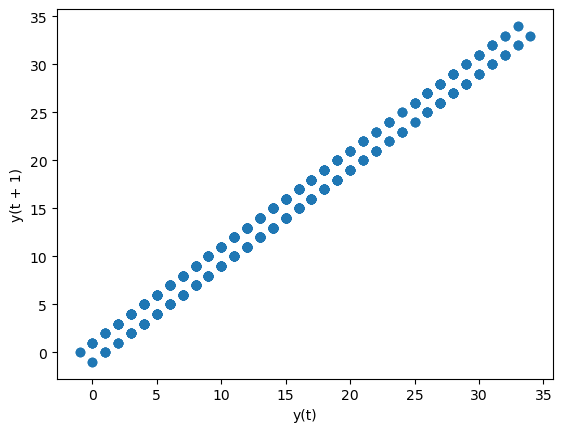

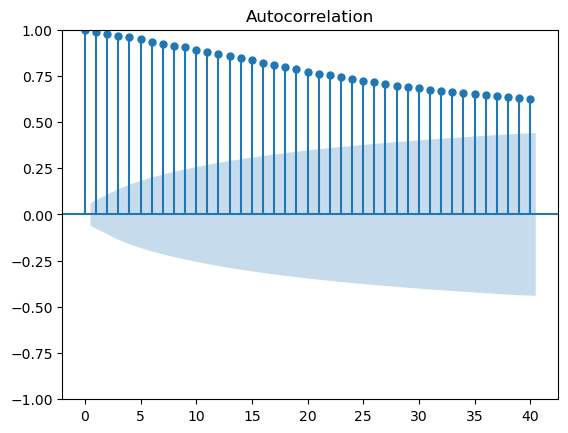

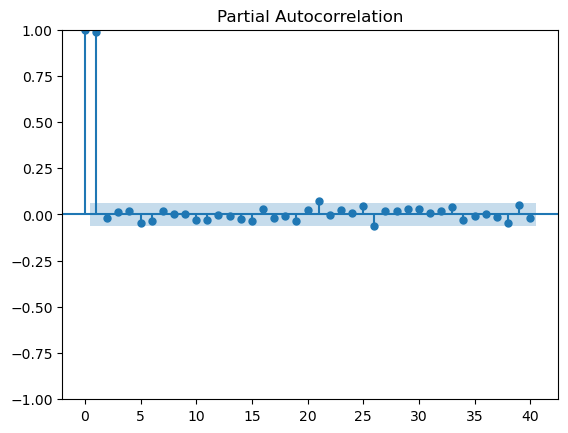

In [282]:
plot(random_walk, 40)

1.2.3

In [283]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(random_walk, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,8942.124393,0.0


1.2.4

In [284]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.519923
p-value: 0.110702
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [285]:
from pandas import read_excel
dataset_temperature = read_excel('global-land-temperature-anomalies-1880-2023.xlsx', 'Data')
dataset_temperature.columns = ['deleteMe', 'year', 'temperature']
print(dataset_temperature.head())
dataset_temperature.drop(columns='deleteMe')

   deleteMe                                               year  temperature
0       NaN                                                NaN          NaN
1       NaN        Global land temperature anomalies 1880-2023          NaN
2       NaN  Annual anomalies in global land surface temper...          NaN
3       NaN                                                NaN          NaN
4       NaN                                               1880        -0.51


,year,temperature
0,NaN,NaN
1,Global land temperature anomalies 1880-2023,NaN
2,Annual anomalies in global land surface temper...,NaN
3,NaN,NaN
4,1880,-0.51
...,...,...
143,2019,1.52
144,2020,1.66
145,2021,1.39
146,2022,1.41


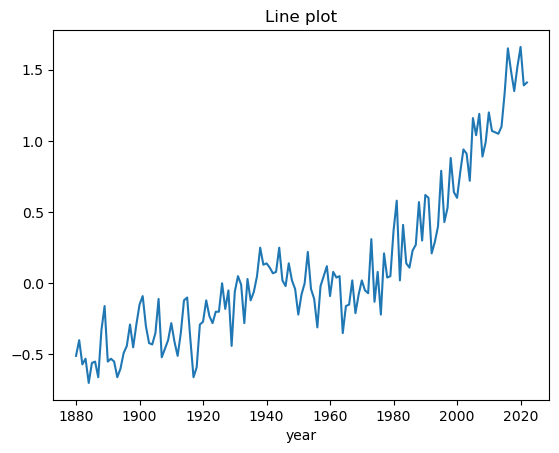

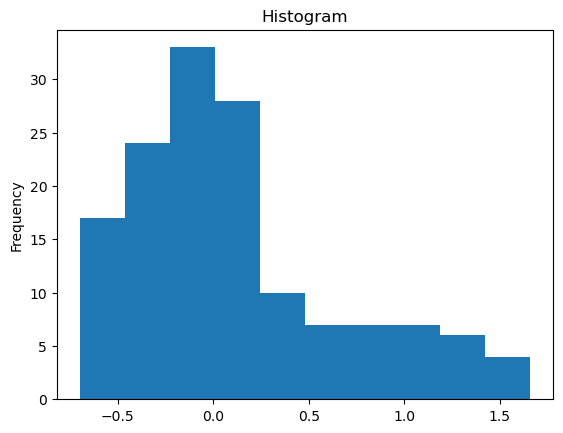

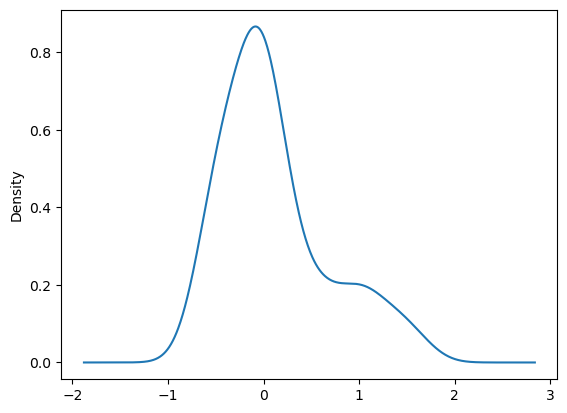

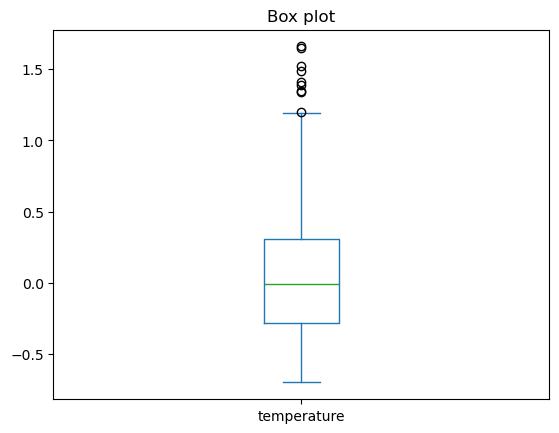

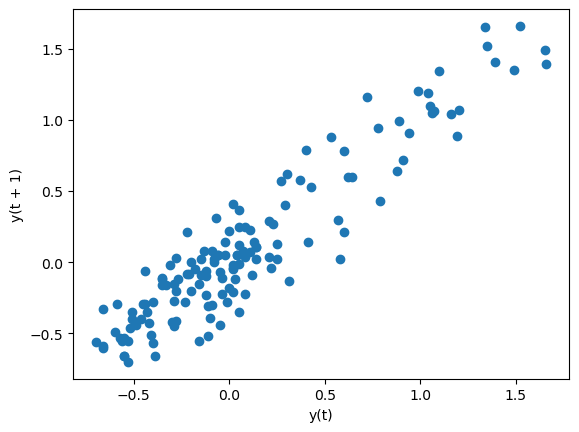

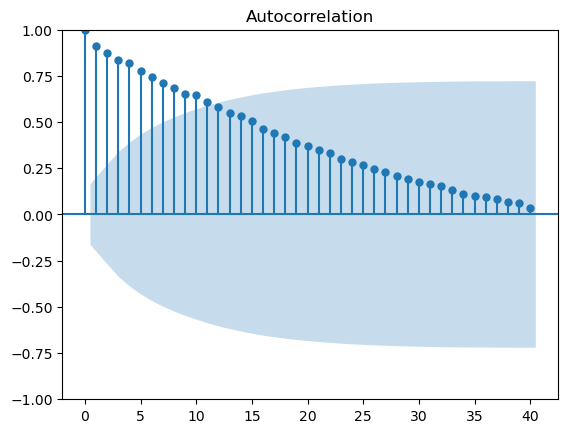

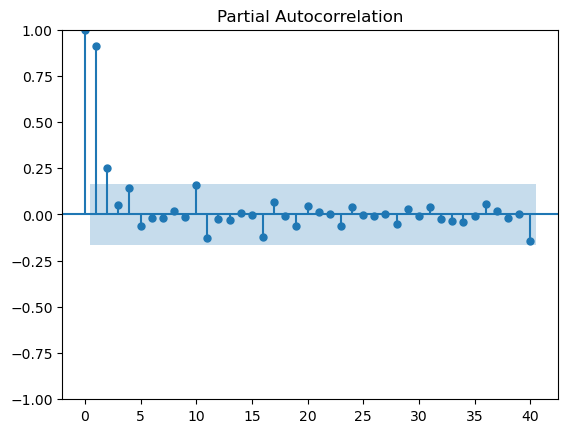

In [286]:
series_temperature=dataset_temperature.iloc[4:147,2]

series_temperature = Series(series_temperature)
series_temperature.index = dataset_temperature.iloc[4:147,1]



plot(series_temperature, 40)

1.3.2

/tmp/ipykernel_49362/2106984184.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  series_first_order.append(series_temperature[i+1]-series_temperature[i])


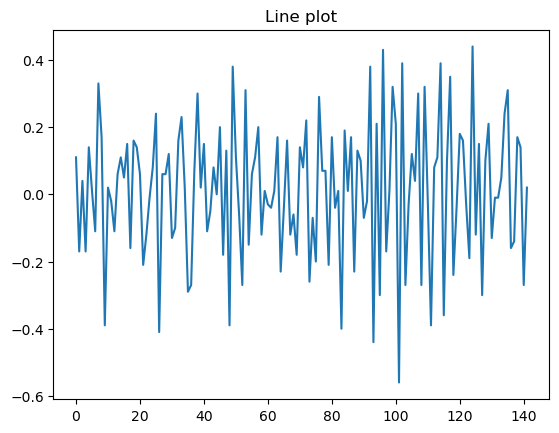

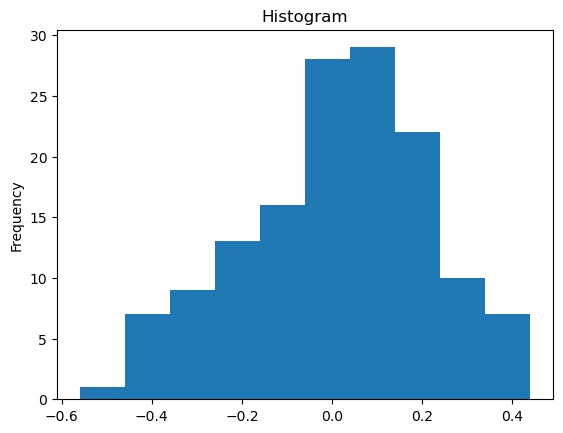

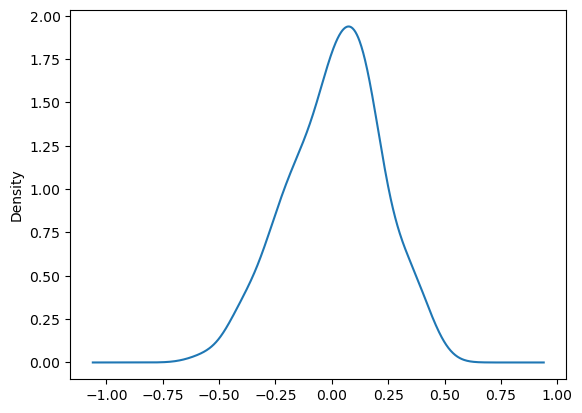

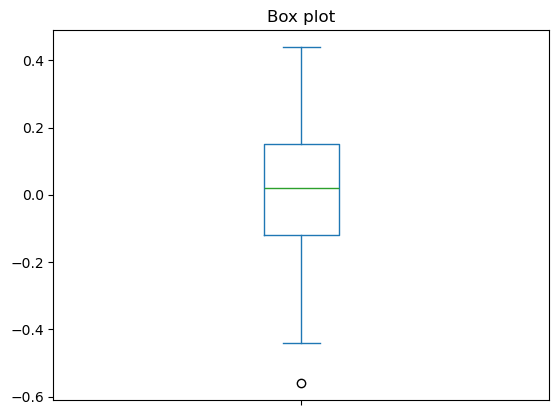

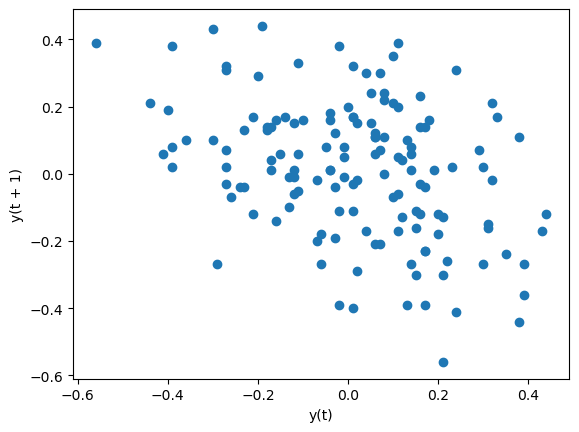

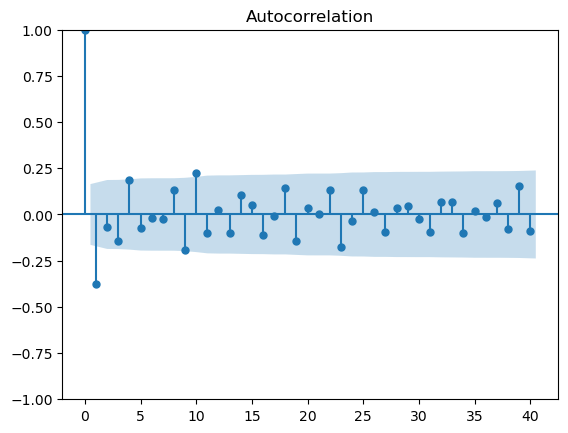

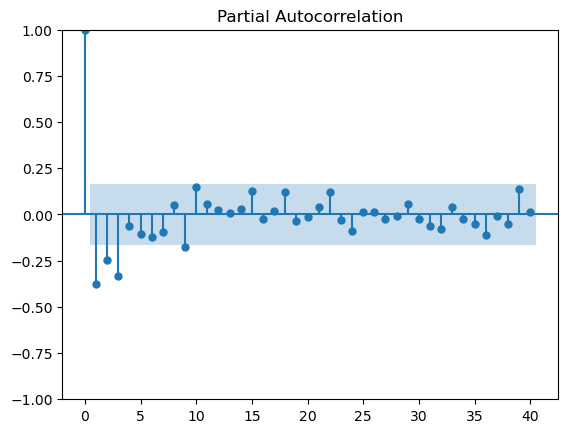

In [287]:
series_first_order = []
for i in range(142):
    series_first_order.append(series_temperature[i+1]-series_temperature[i])

series_first_order = Series(series_first_order)
plot(series_first_order, 40)

1.3.3
test if original and differenced anomaly series are random

In [288]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(series_temperature, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,891.322264,4.694010e-185


In [289]:
sm.stats.acorr_ljungbox(series_first_order, lags=[10], return_df=True)      

,lb_stat,lb_pvalue
10,47.203683,8.670322e-07


1.3.4
test if original and differenced anomaly series are stationary

In [290]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series_temperature)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.797073
p-value: 1.000000
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578


In [291]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series_first_order)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.019677
p-value: 0.000000
Critical Values:
	1%: -3.478
	5%: -2.883
	10%: -2.578


1.3.5 classical decomposition and STL decomposition

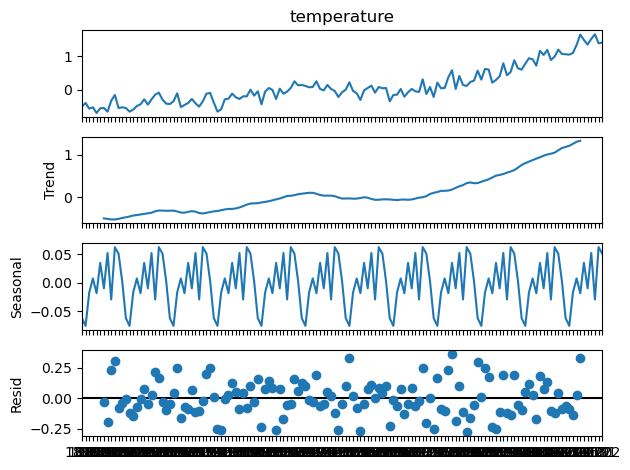

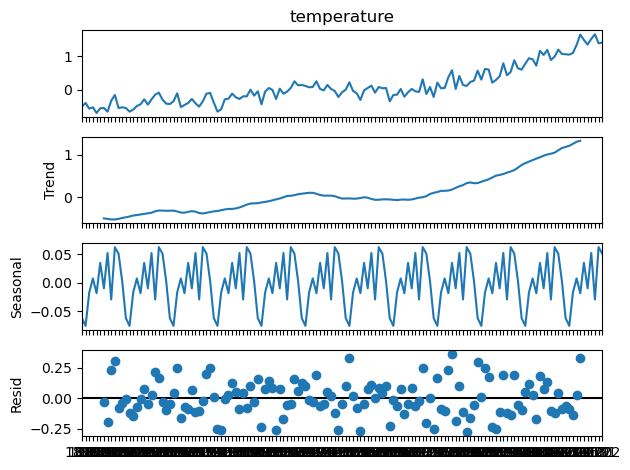

In [292]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series_temperature, model='additive', period=12)
result.plot()

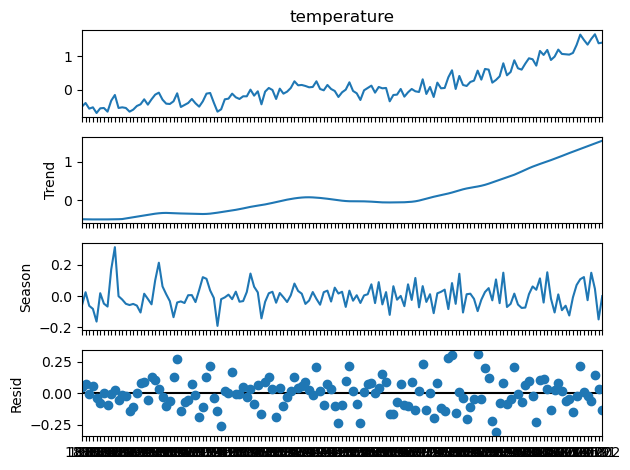

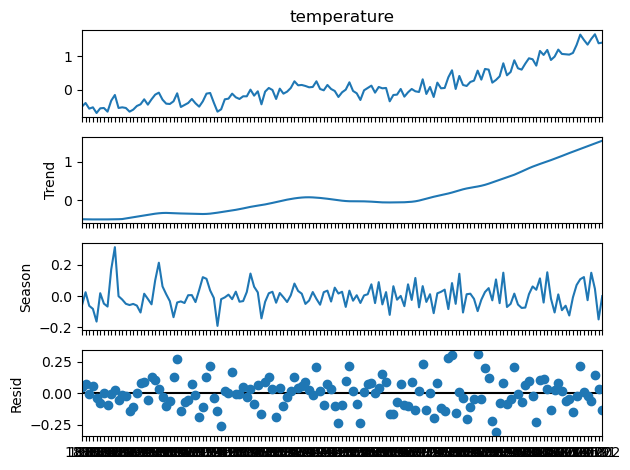

In [293]:
from statsmodels.tsa.seasonal import STL
result = STL(series_temperature, period=12).fit()
result.plot()